In [132]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import cv2
from PIL import Image
import os
import matplotlib.pyplot as plt

In [122]:
# 2 painters simple convnet

In [134]:
def create_simpleconvnet():
    inputs = keras.Input(shape=(550, 412, 3))
    x = layers.Rescaling(1./255)(inputs)
    x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
    x = layers.MaxPool2D(pool_size=2)(x)
    x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
    x = layers.MaxPool2D(pool_size=2)(x)
    x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
    x = layers.MaxPool2D(pool_size=2)(x)
    x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)    
    x = layers.MaxPool2D(pool_size=2)(x)
    x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
    x = layers.Flatten()(x)
    outputs = layers.Dense(2, activation='relu')(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    
    model.compile(loss="categorical_crossentropy",optimizer='rmsprop', metrics=["accuracy"])

    model.summary()
    
    return model

In [135]:
model = create_simpleconvnet()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 550, 412, 3)]     0         
                                                                 
 rescaling_12 (Rescaling)    (None, 550, 412, 3)       0         
                                                                 
 conv2d_59 (Conv2D)          (None, 548, 410, 32)      896       
                                                                 
 max_pooling2d_48 (MaxPooli  (None, 274, 205, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_60 (Conv2D)          (None, 272, 203, 64)      18496     
                                                                 
 max_pooling2d_49 (MaxPooli  (None, 136, 101, 64)      0         
 ng2D)                                                    

In [136]:
#mix arrays per n elements

def mix(elements1:[], elements2:[], n=5):
    objects_set = []
    labels_set = []
    i = 0
    while i < len(elements1) and i < len(elements2):
            objects_set.append(np.reshape(elements1[i], (550, 412, 3)))
            labels_set.append([1, 0])
    
            objects_set.append(np.reshape(elements2[i], (550, 412, 3)))
            labels_set.append([0, 1])
            
            i+=1
            
    return np.array(objects_set), np.array(labels_set)
    

200
Epoch 1/10
6/6 [==============================] - 15s 3s/step - loss: 7.5591 - accuracy: 0.4824 - val_loss: 8.0590 - val_accuracy: 0.5000
Epoch 2/10
6/6 [==============================] - 15s 2s/step - loss: 8.0590 - accuracy: 0.5000 - val_loss: 8.0590 - val_accuracy: 0.5000
Epoch 3/10
6/6 [==============================] - 14s 2s/step - loss: 8.0590 - accuracy: 0.5000 - val_loss: 8.0590 - val_accuracy: 0.5000
Epoch 4/10
6/6 [==============================] - 15s 2s/step - loss: 8.0590 - accuracy: 0.5000 - val_loss: 8.0590 - val_accuracy: 0.5000
Epoch 5/10
6/6 [==============================] - 14s 2s/step - loss: 8.0590 - accuracy: 0.5000 - val_loss: 8.0590 - val_accuracy: 0.5000
Epoch 6/10
6/6 [==============================] - 15s 2s/step - loss: 8.0590 - accuracy: 0.5000 - val_loss: 8.0590 - val_accuracy: 0.5000
Epoch 7/10
6/6 [==============================] - 14s 2s/step - loss: 8.0590 - accuracy: 0.5000 - val_loss: 8.0590 - val_accuracy: 0.5000
Epoch 8/10
6/6 [==============

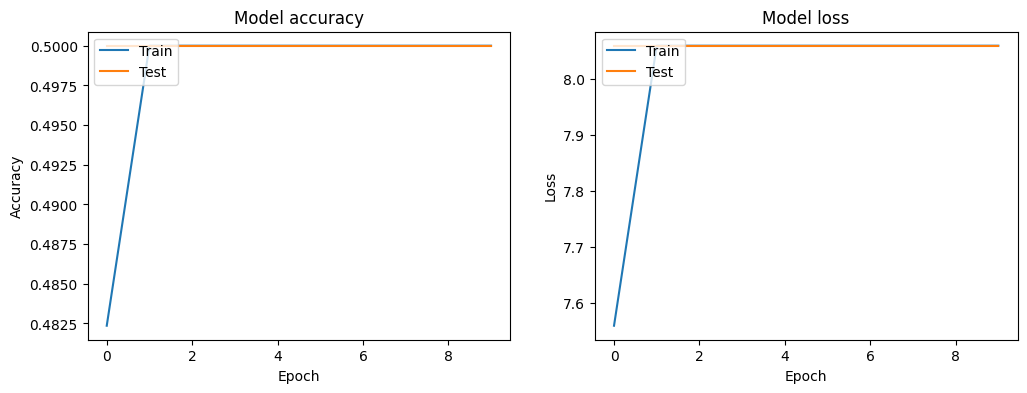

In [137]:
cwd = os.getcwd()
dir_train_rubens = "dataset/validation/rubens"
dir_train_picasso= "dataset/validation/picasso"
dir_validation_rubens = "dataset/test/rubens"
dir_validation_picasso= "dataset/test/picasso"
file_train_rubens = os.listdir(dir_train_rubens)
file_validation_rubens = os.listdir(dir_validation_rubens)
file_train_picasso = os.listdir(dir_train_picasso)
file_validation_picasso = os.listdir(dir_validation_picasso)

train_rubens =[Image.open(os.path.join(dir_train_rubens, file)) for file in file_train_rubens]
train_picasso =[Image.open(os.path.join(dir_train_picasso, file)) for file in file_train_picasso]
validation_rubens = [Image.open(os.path.join(dir_validation_rubens, file)) for file in file_validation_rubens]
validation_picasso = [Image.open(os.path.join(dir_validation_picasso, file)) for file in file_validation_picasso]

train_set, train_labels = mix(train_rubens, train_picasso)
validation_set, validation_labels = mix(validation_rubens, validation_picasso)

train_set = train_set.reshape(len(train_set), 550, 412, 3)
validation_set = validation_set.reshape(len(validation_set), 550, 412, 3)

print(len(validation_set))

callbacks = [keras.callbacks.ModelCheckpoint(filepath="convnet_from_scratch.keras")]

history = model.fit(train_set, train_labels, validation_data=(validation_set, validation_labels), epochs=10, batch_size=32, callbacks=callbacks)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [138]:
cwd = os.getcwd()
dir_test_rubens = "dataset/test/rubens"
dir_test_picasso= "dataset/test/picasso"
file_train_rubens = os.listdir(dir_train_rubens)
file_test_rubens = os.listdir(dir_test_rubens)
file_train_picasso = os.listdir(dir_train_picasso)
file_test_picasso = os.listdir(dir_test_picasso)

test_rubens = [Image.open(os.path.join(dir_test_rubens, file)) for file in file_validation_rubens]
test_picasso = [Image.open(os.path.join(dir_test_picasso, file)) for file in file_test_picasso]

test_set, test_labels = mix(test_rubens, test_picasso)

train_set = train_set.reshape(len(train_set), 550, 412, 3)
test_set = test_set.reshape(len(test_set), 550, 412, 3)

test_model = keras.models.load_model('convnet_from_scratch.keras')
test_loss, test_acc = test_model.evaluate(test_set, test_labels)
print('Test loss:', test_loss)

7/7 [==============================] - 3s 372ms/step - loss: 8.0590 - accuracy: 0.5000
Test loss: 8.05904769897461
